In [2]:
from astropy.io import ascii 
from astropy.table import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.cosmology import WMAP9 as cosmo
from astropy.modeling import models, fitting
import os
import pickle
from scipy.optimize import curve_fit
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Load Clusters

In [3]:
#total catalog from COSMOS(2016)
total = Table.read('./datas/cosmos2015_2.fits')

#mass complete sample
total_z = total[(total['zphot'] > 0) & (total['zphot'] < 9) & (total['OType'] == 0) & (total['Mass'] > 9.516)]

In [4]:
total_pd = total_z.to_pandas()

In [5]:
#save index of overdense region
with open(f'./candidates/ras_final.txt', 'rb') as f:
    ras = pickle.load(f)

with open(f'./candidates/decs_final.txt', 'rb') as f:
    decs = pickle.load(f)

with open(f'./candidates/zs_final.txt', 'rb') as f:
    zs = pickle.load(f)
    
with open(f'./candidates/members_final.txt', 'rb') as f:
    members = pickle.load(f)


In [6]:
with open('./fofs.txt', 'rb') as f:
    fofs = pickle.load(f)
    
with open('./fqs.txt', 'rb') as f:
    fqs = pickle.load(f)

In [7]:
ras = np.array(ras)
decs = np.array(decs)
zs = np.array(zs)

In [8]:
hms = []
for i in range(len(members)):
    mem_mask = total_pd['Seq'].isin(members[i])
    mem = total_pd[mem_mask]
    
    hm = np.log10(sum(47.36 * 10**mem['Mass']))
    hms.append(hm)
hms = np.array(hms)

/home/ehko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


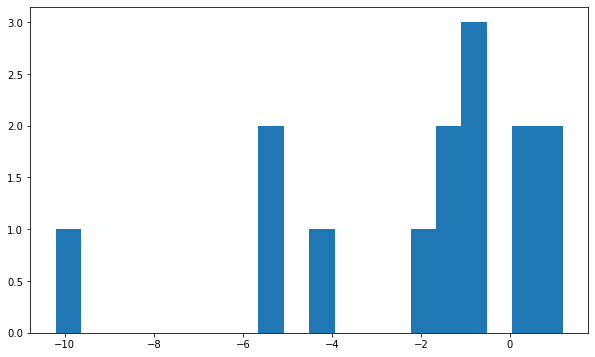

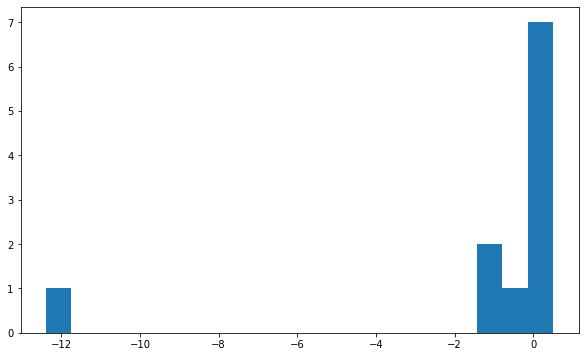

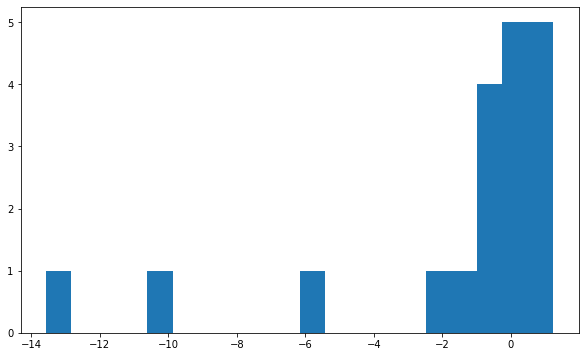

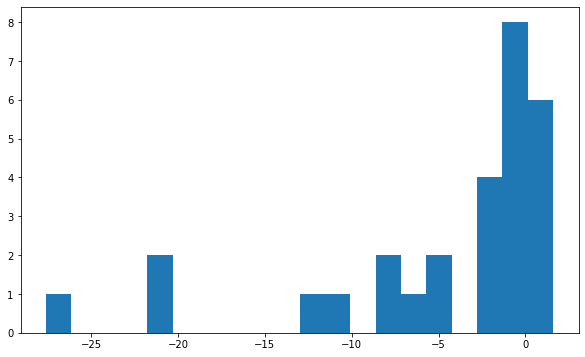

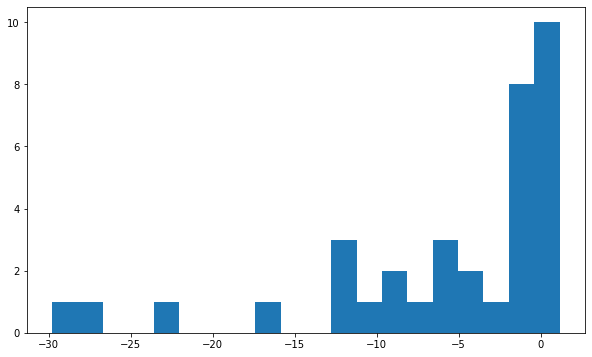

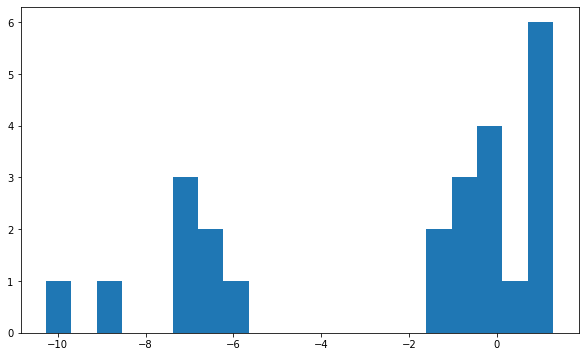

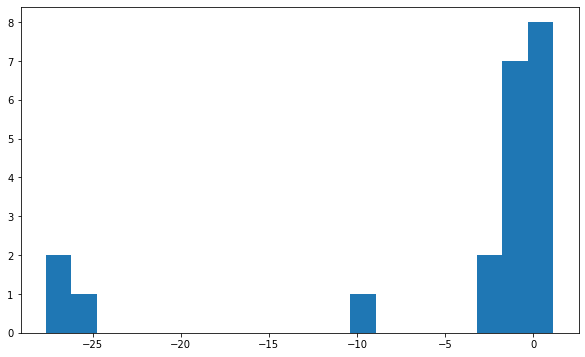

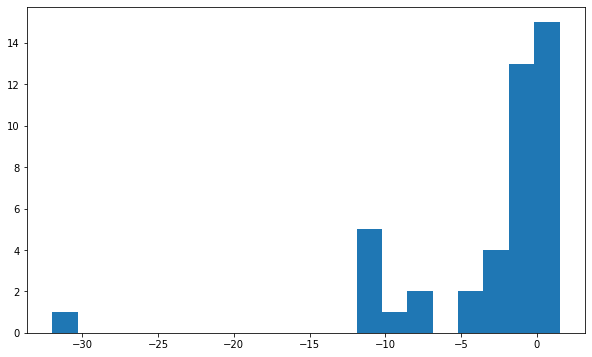

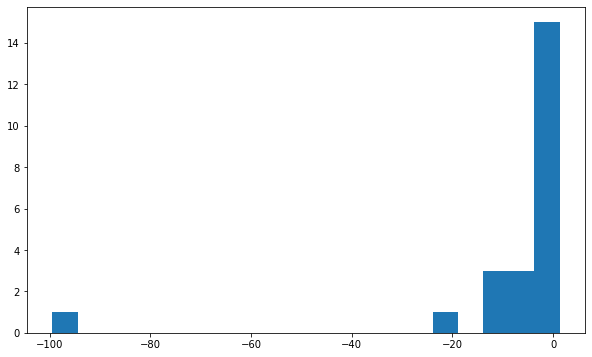

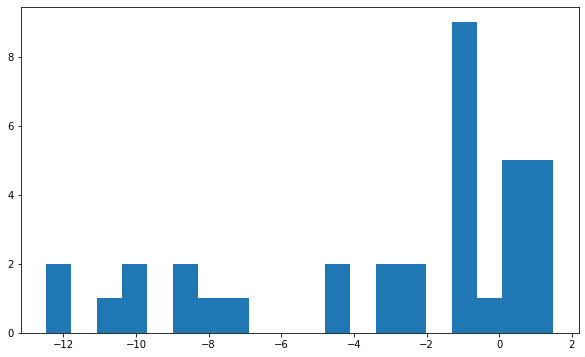

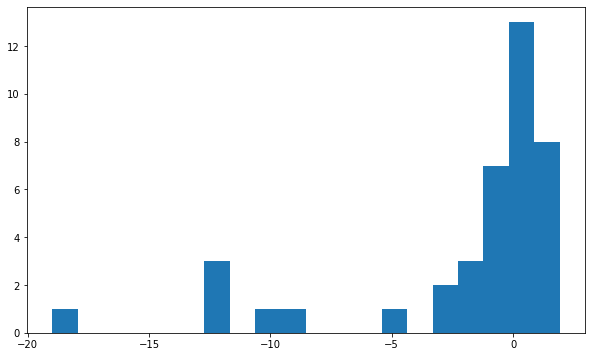

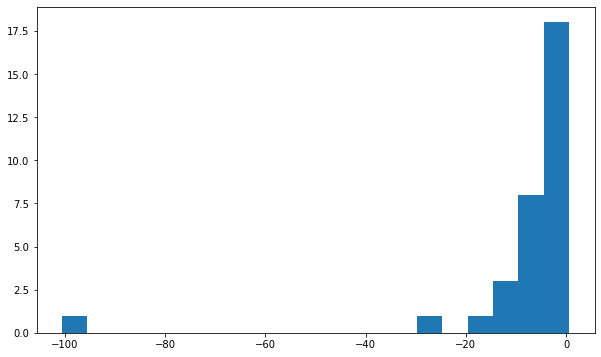

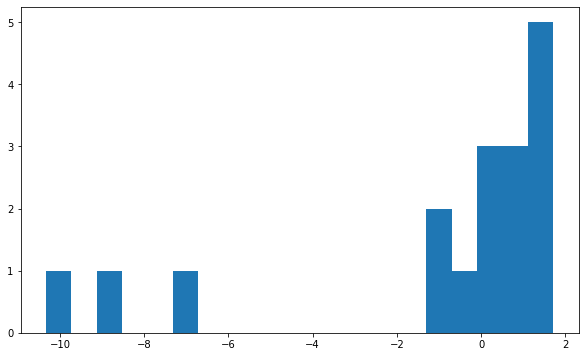

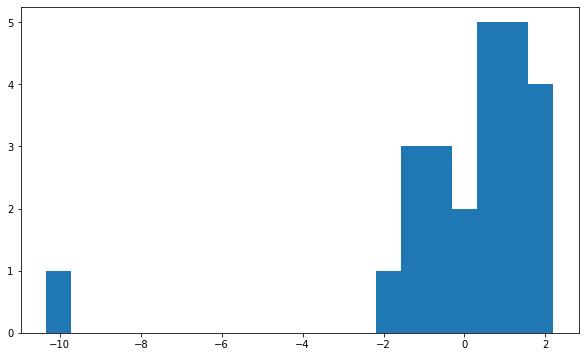

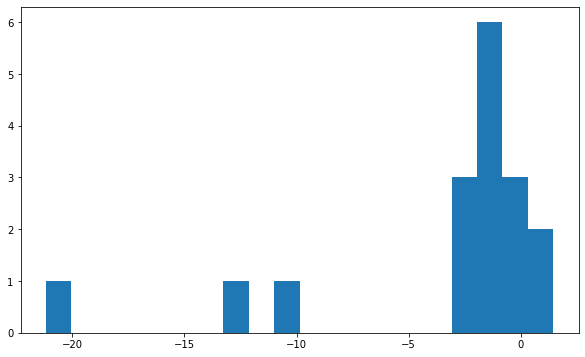

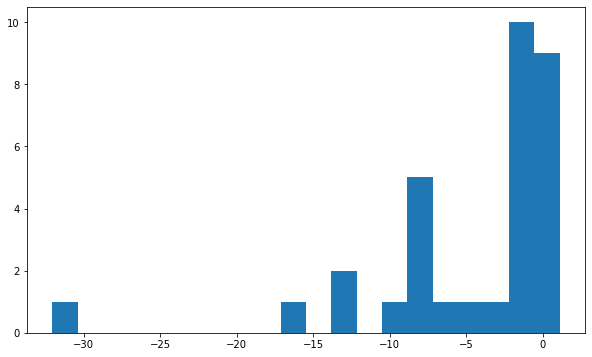

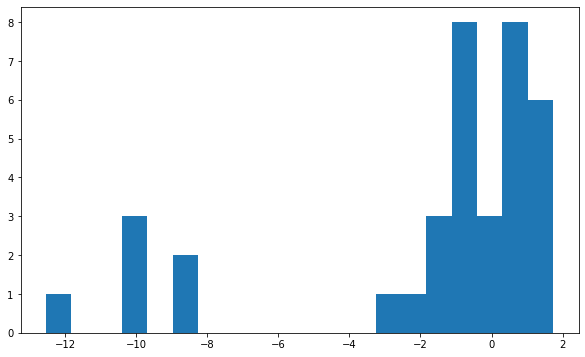

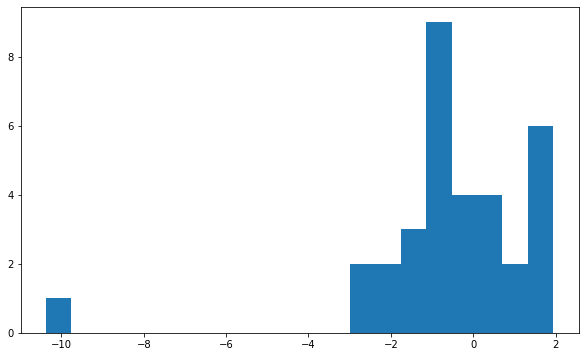

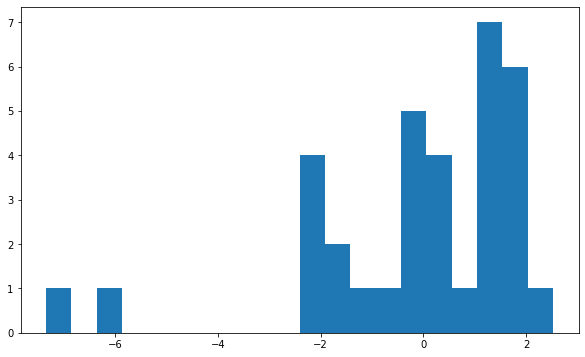

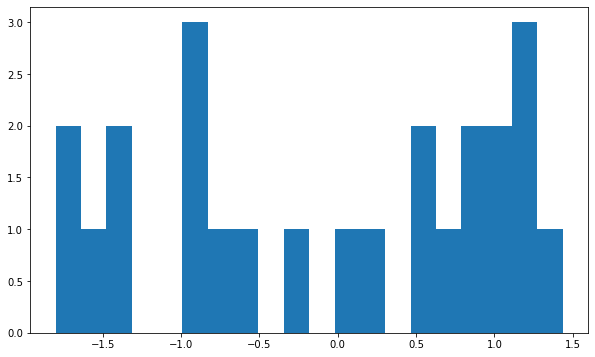

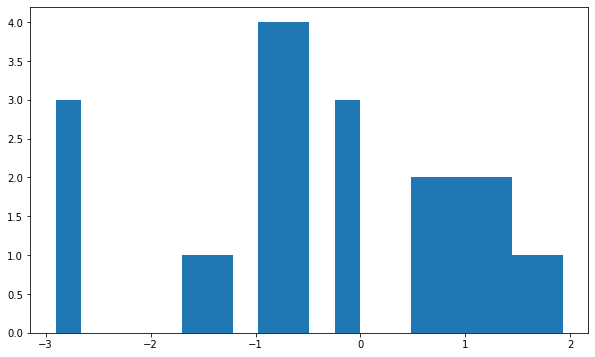

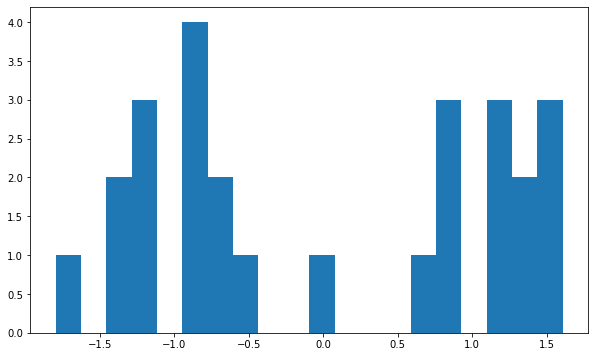

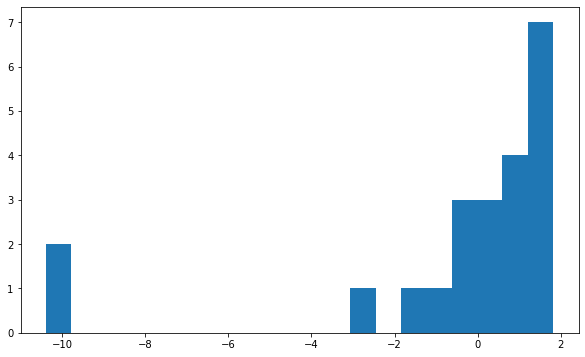

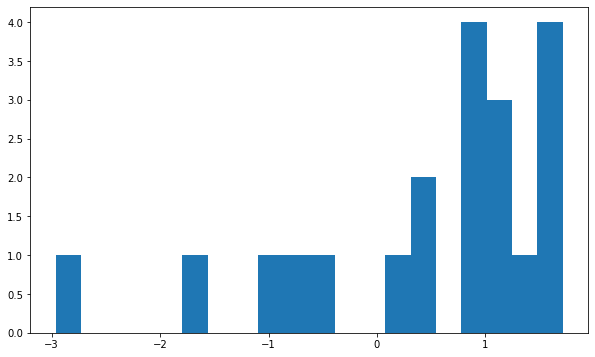

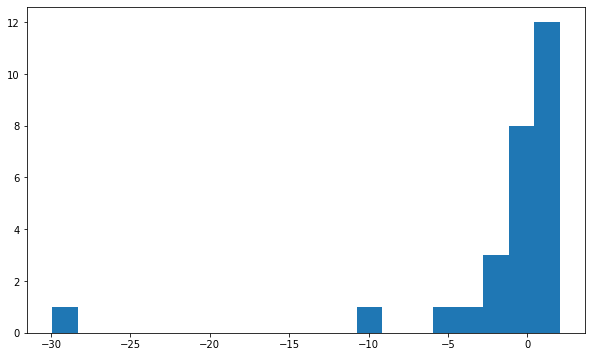

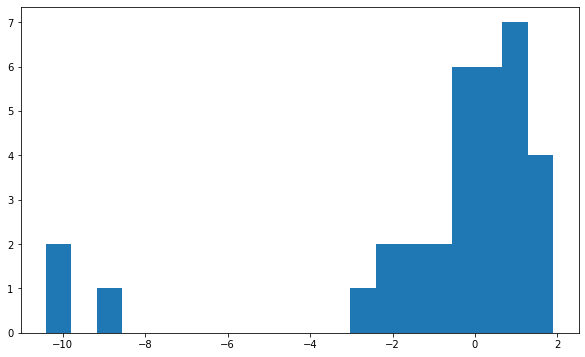

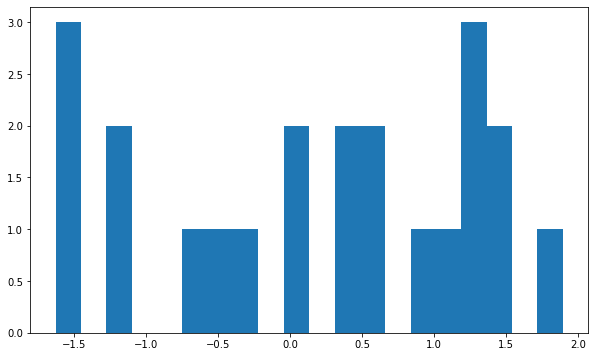

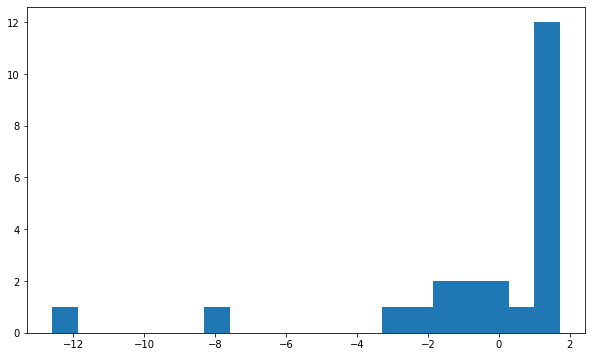

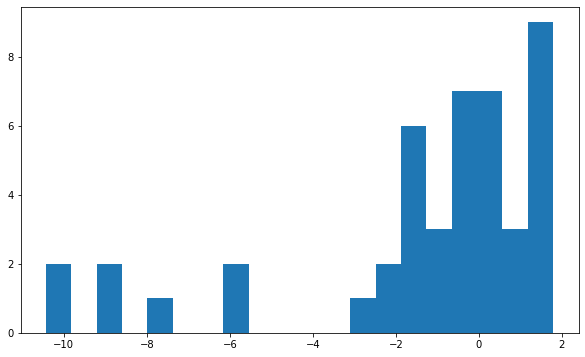

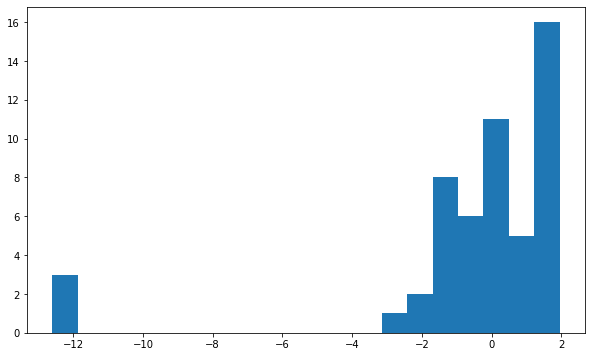

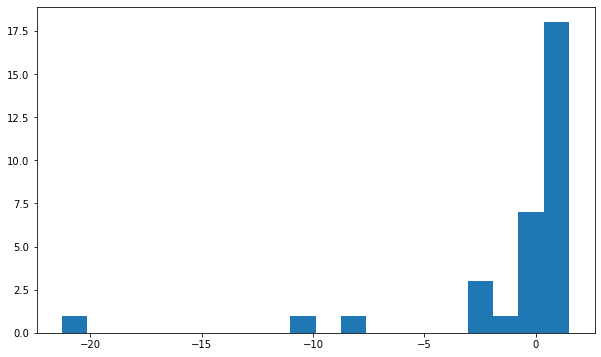

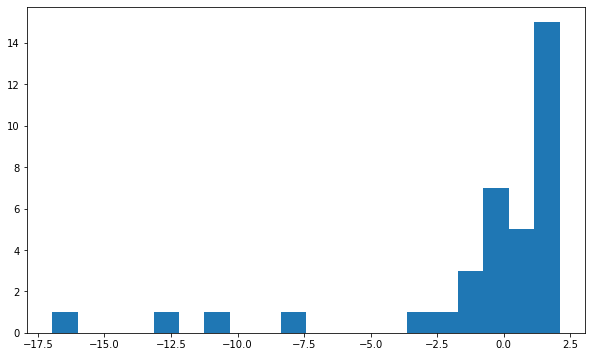

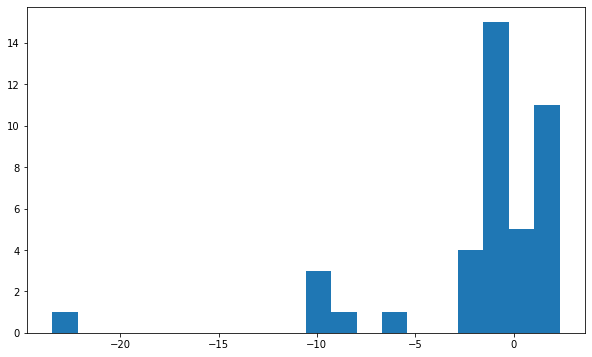

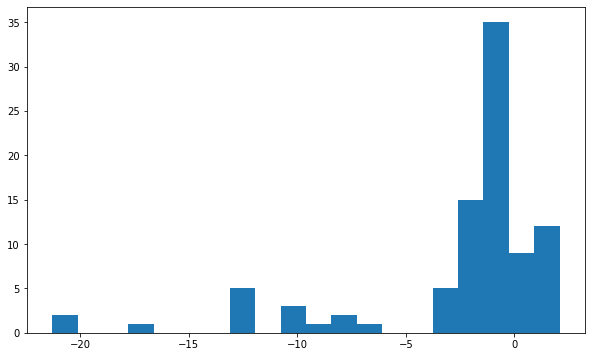

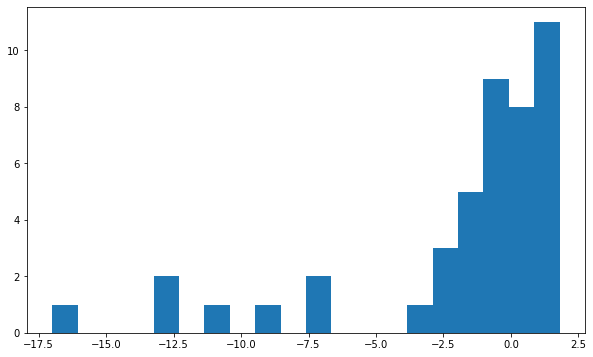

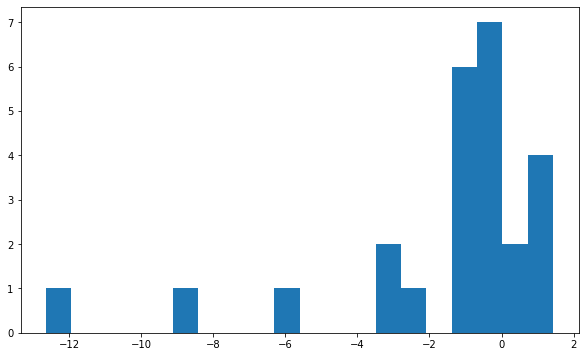

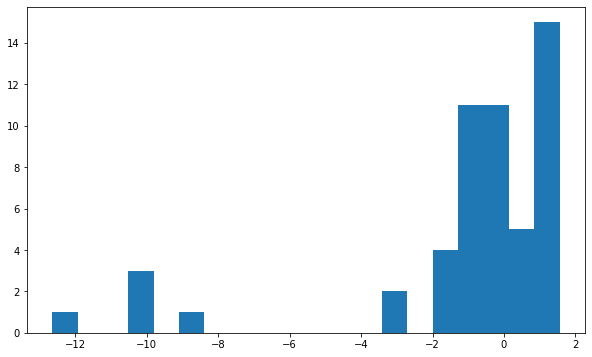

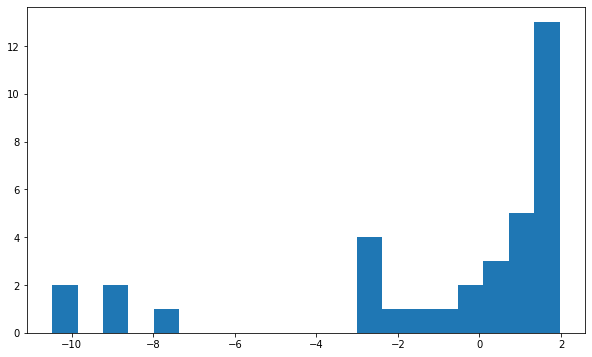

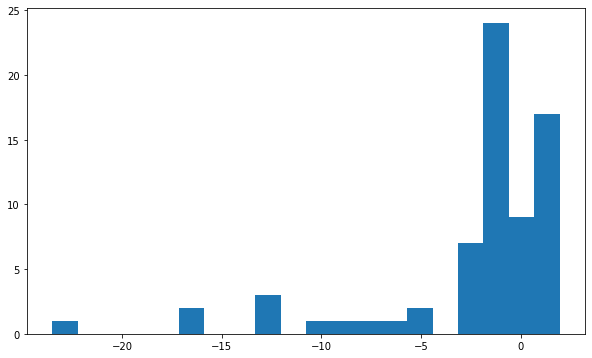

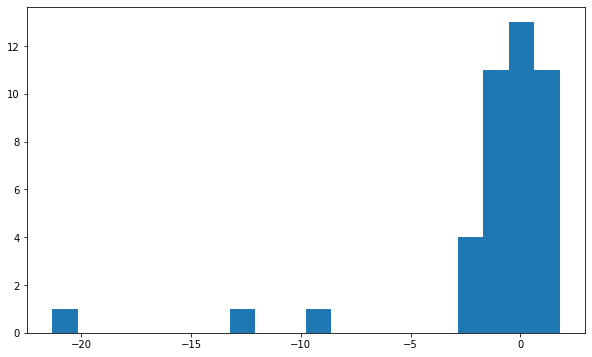

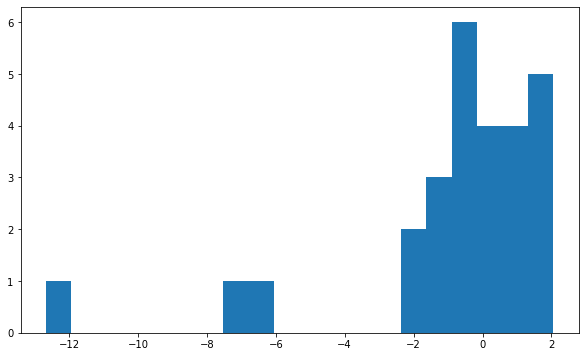

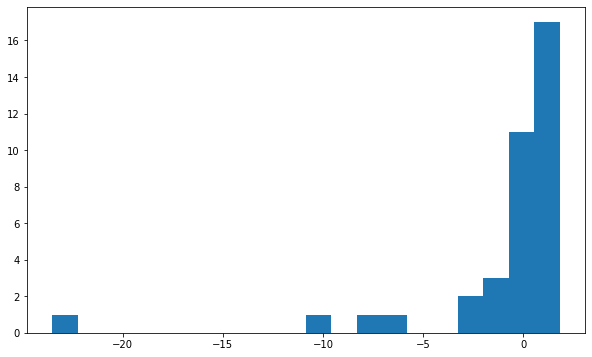

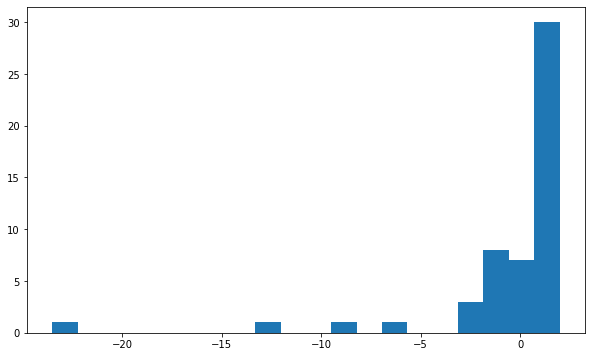

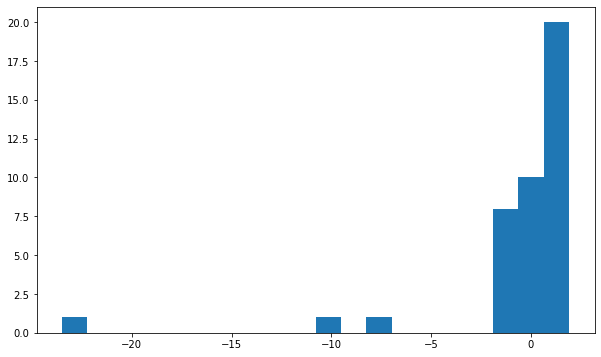

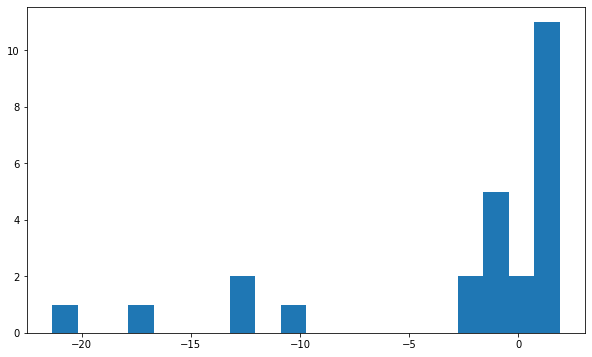

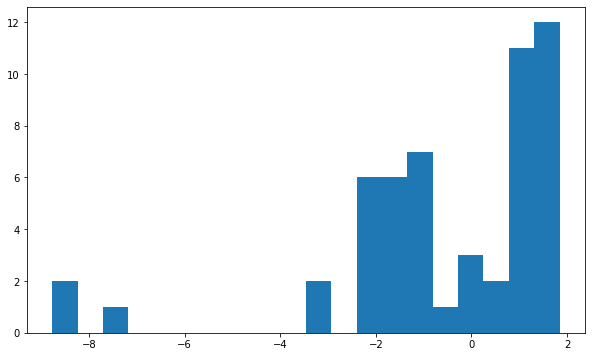

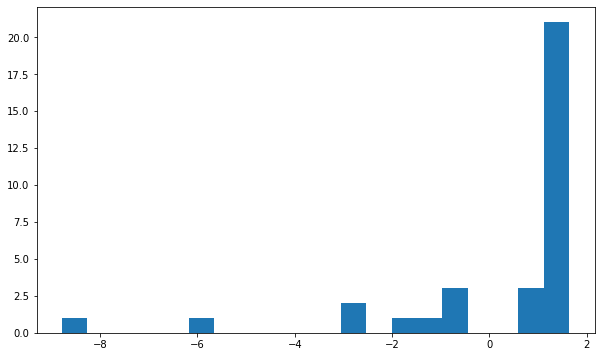

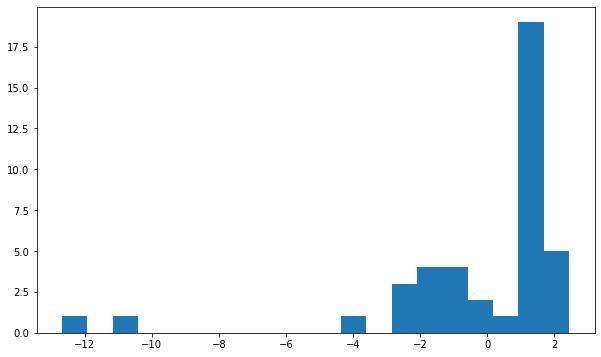

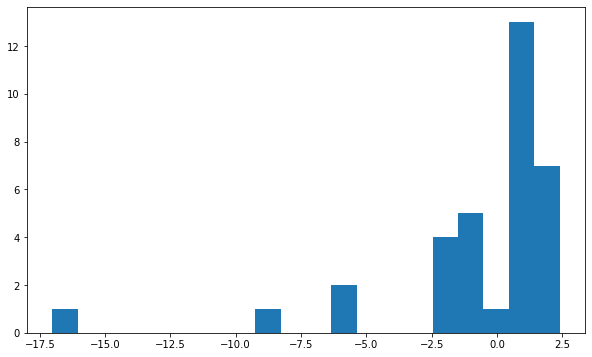

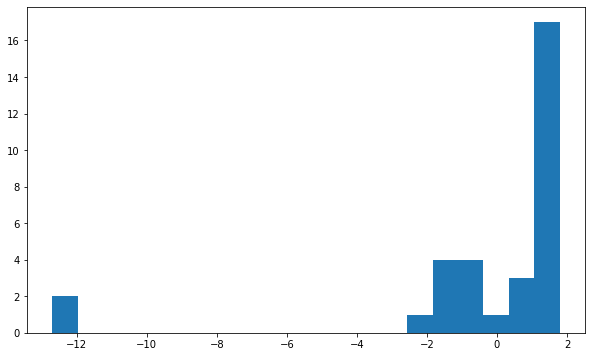

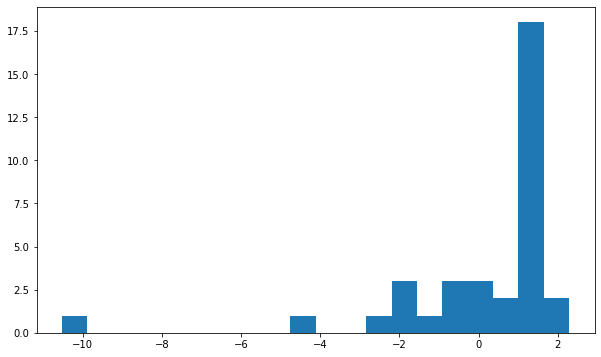

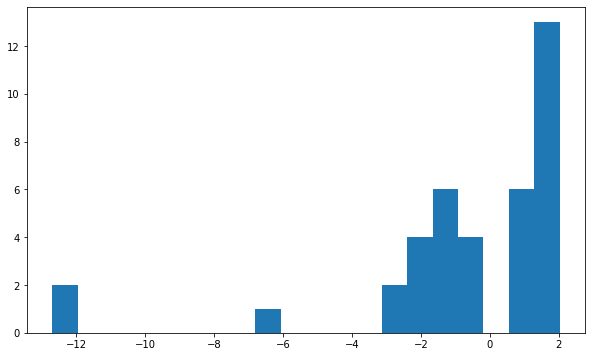

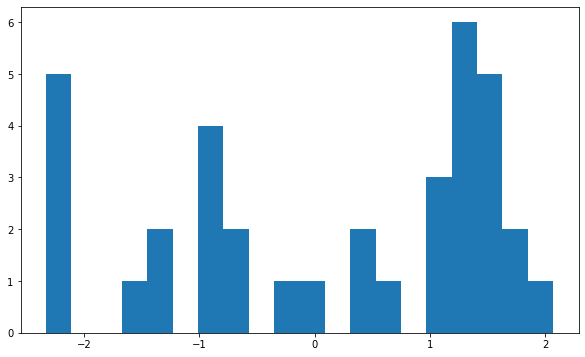

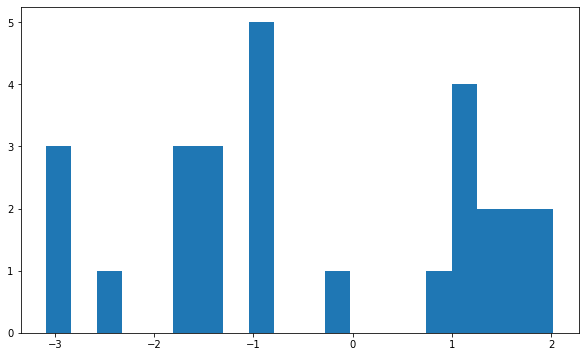

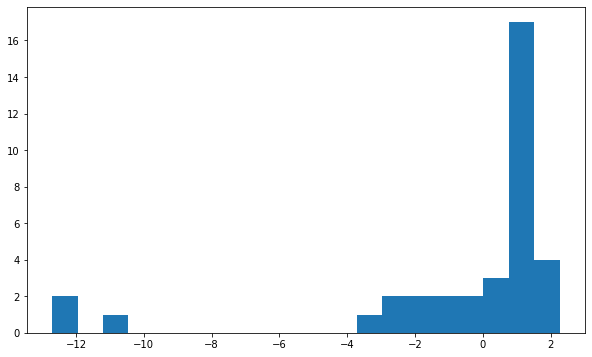

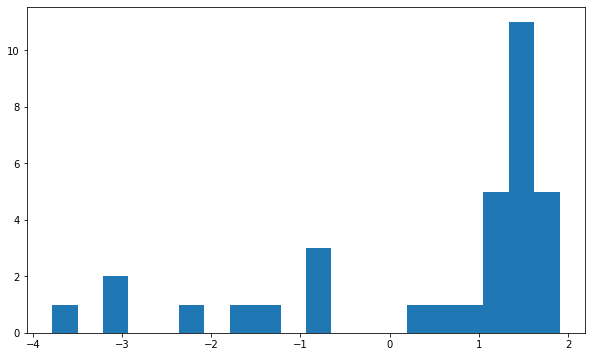

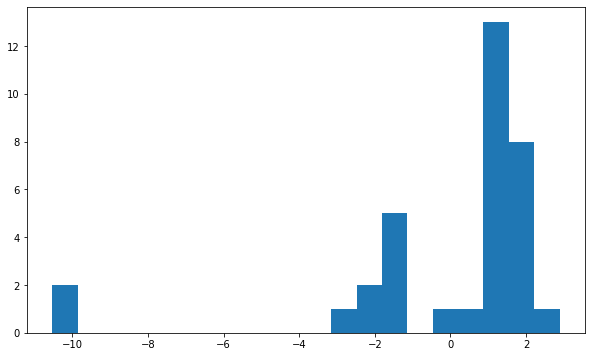

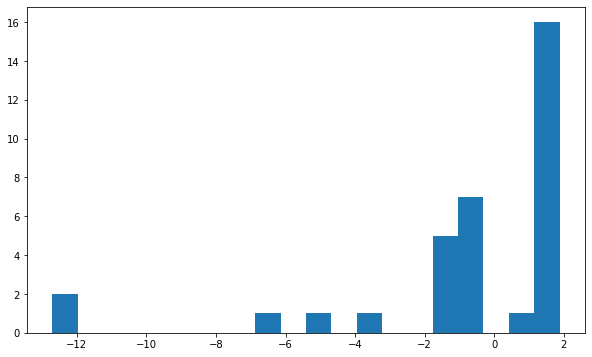

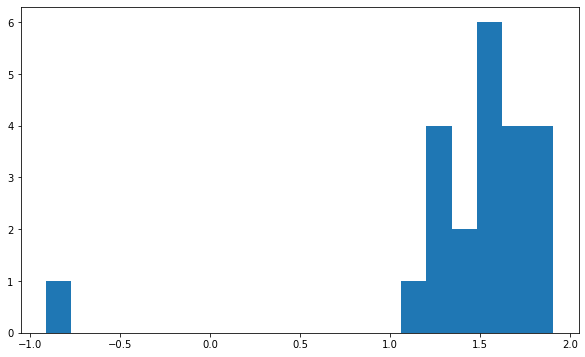

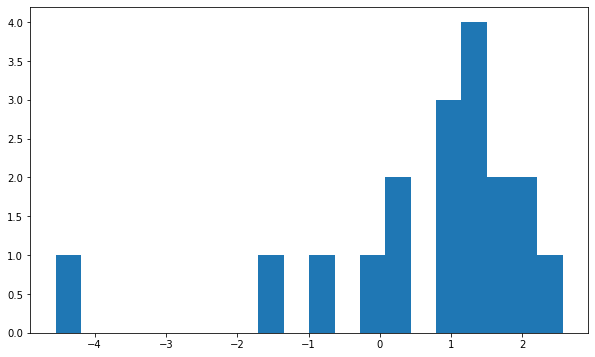

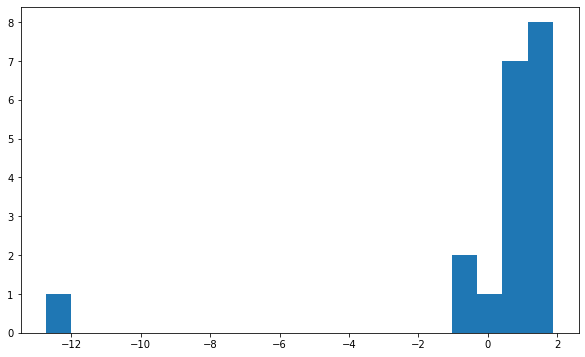

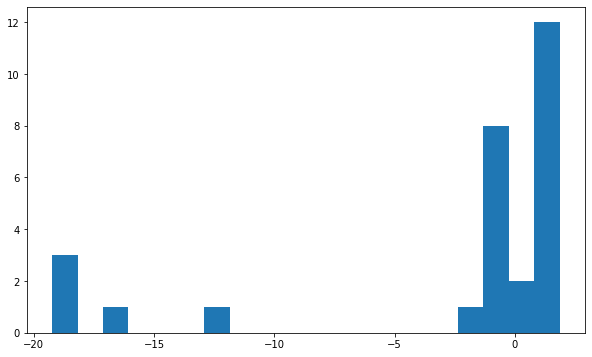

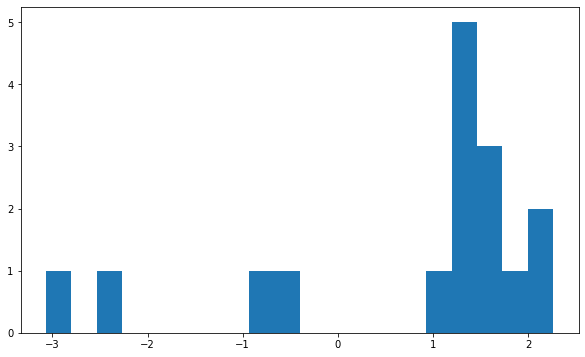

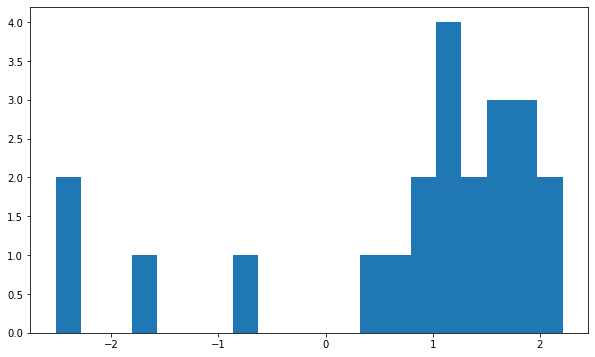

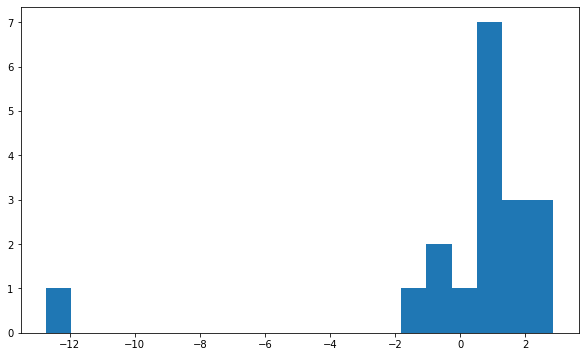

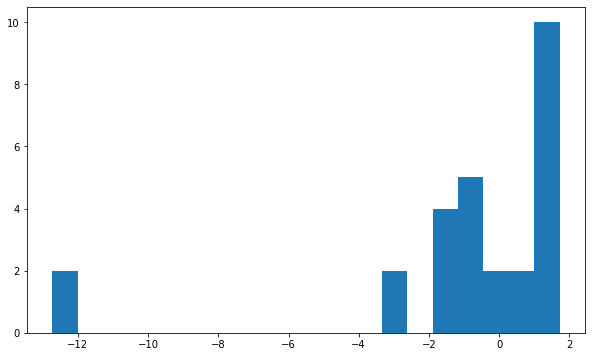

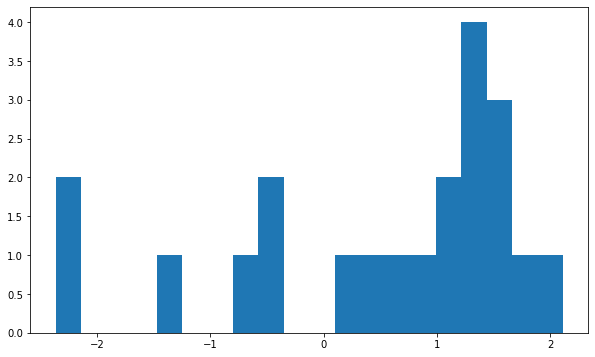

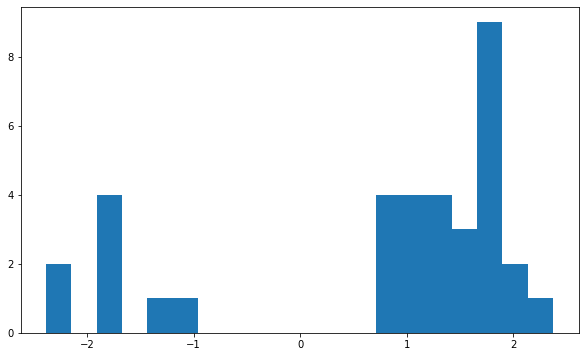

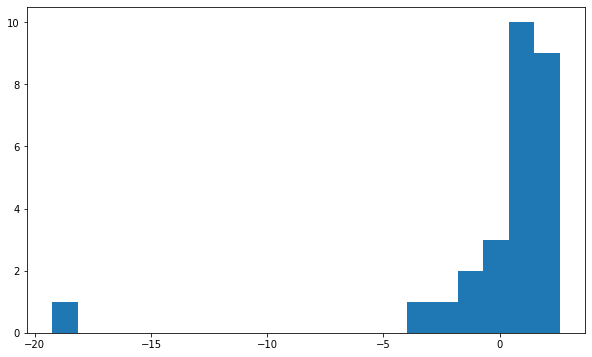

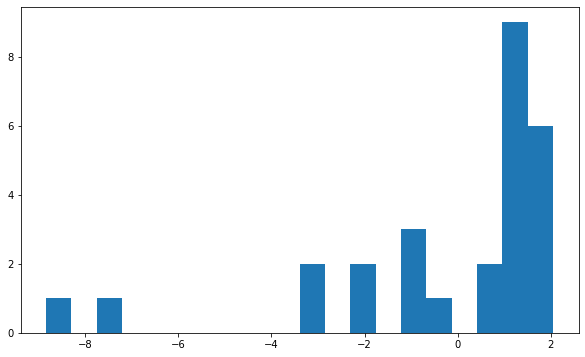

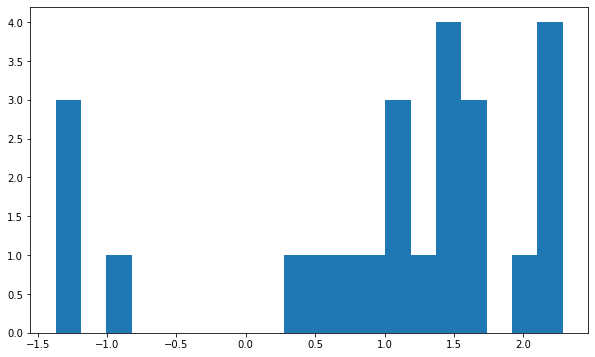

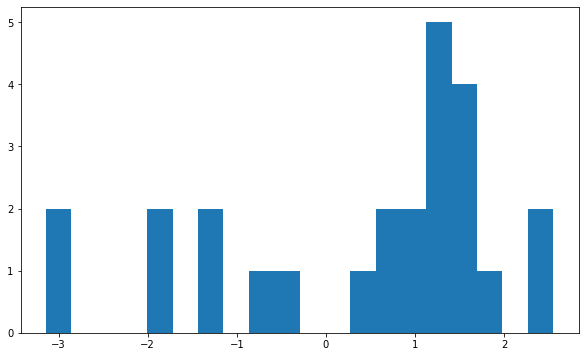

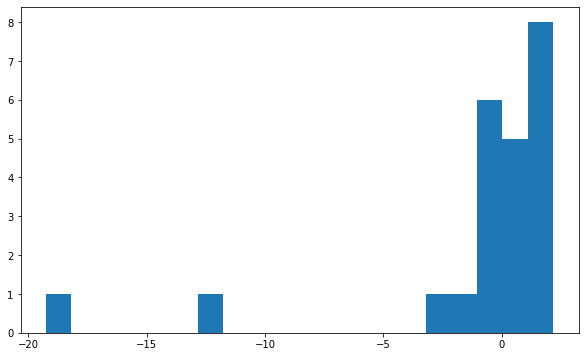

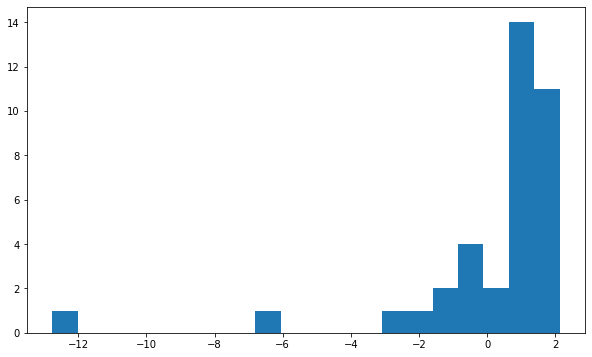

In [21]:
for mems in range(len(members)):
    
    smask = total_pd['Seq'].isin(members[mems])
    samp = total_pd[smask]
    
    flag = np.log10(10**np.array(samp['sSFR']) * 3 * cosmo.age(samp['zphot']).to(u.yr).value)
    
    plt.figure(figsize = (10, 6))
    plt.hist(flag, bins = 20)

[499190,
 503442,
 504869,
 500707,
 505822,
 506363,
 506407,
 501447,
 502854,
 503588,
 503160,
 508551,
 510233,
 510977,
 503869,
 505118,
 510768,
 512032,
 515630,
 508580,
 513886,
 514834,
 515622,
 518822,
 511263,
 514013,
 517198,
 522790,
 527113,
 530268,
 530009,
 532727,
 532217,
 534526,
 530211,
 529547,
 529334]

# Field Correction

## real data

In [9]:
overall_fqs = []
for i in range(len(zs)):
    print(i, end = ' ')
    smask = (total_z['zphot'] > zs[i] - 0.2) & (total_z['zphot'] < zs[i] + 0.2)
    samp = total_z[smask]

    age = cosmo.age(samp['zphot']).to(u.yr).value
    ssfr_mask  = 10**samp['sSFR'] * 3 * age < 0.1913

    ssfr = samp[ssfr_mask]

    fq = len(ssfr) / len(samp)
    overall_fqs.append(fq)

overall_fqs = np.array(overall_fqs)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 

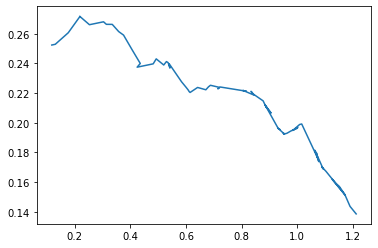

In [10]:
plt.plot(zs, overall_fqs)

## From mass function

In [11]:
integral_qs = [23.7033, 16.8541, 8.90955, 4.25614, 1.33932, 0.775395, 0.0625919]
integral_sfs = [44.4166, 39.5634, 26.0143, 18.3347, 9.57915, 5.94009, 0.629887]

In [12]:
integral_qs = np.array(integral_qs)
integral_sfs = np.array(integral_sfs)

In [13]:
fqs = integral_qs / (integral_qs + integral_sfs)

In [14]:
reds = np.array([0.35, 0.75, 1.25, 1.75, 2.25, 2.75, 3.5])
xs = np.arange(0., 3.5, 0.05)

In [15]:
temps = np.polyfit(reds, fqs, 3)

In [16]:
ups = [2.00059e18, 1.59358e18, 1.25357e18, 9.72534e17, 7.42938e17, 5.57789e17, 4.10641e17, 2.95605e17, 
      2.07352e17, 1.41107e17, 9.26405e16, 5.8247e16, 3.47294e16, 1.93734e16, 9.9201e15, 4.53713e15,
      1.78572e15, 5.886278e14, 1.81005e14, 9.33713e13, 8.19843e13, 7.58229e13, 7.0181e13, 6.50164e13,
      6.02898e13, 5.59654e13, 5.20098e13, 4.83927e13, 4.50857e13, 4.20631e13, 3.93011e13, 3.67777e13,
      3.44729e13, 3.23681e13, 3.04464e13, 2.86921e13, 2.70908e13, 2.56295e13, 2.4296e13, 2.30792e13,
      2.1969e13, 2.0956e13, 2.00317e13, 1.91882e13, 1.84184e13, 1.77155e13, 1.70737e13, 1.64874e13,
      1.59515e13, 1.54614e13, 1.50128e13, 1.4602e13, 1.42253e13, 1.38796e13, 1.35618e13, 1.32694e13,
      1.29998e13, 1.27508e13, 1.25204e13, 1.23067e13, 1.2108e13, 1.19228e13, 1.17496e13, 1.15873e13,
      1.14347e13, 1.12907e13, 1.11544e13, 1.10249e13]

downs = [5.52798e18, 4.44861e18, 3.5367e18, 2.77411e18, 2.14338e18, 1.6282e18, 1.21327e18, 8.84354e17,
        6.28363e17, 4.33326e17, 2.8841e17, 1.83919e17, 1.11284e17, 6.30428e16, 3.28214e16, 1.52999e16,
        6.1772e15, 2.12446e15, 7.28567e14, 4.20844e14, 3.8e14, 3.57364e14, 3.36176e14, 3.1634e14,
        2.97763e14, 2.80362e14, 2.64056e14, 2.48773e14, 2.34444e14, 2.21007e14, 2.08401e14, 1.96572e14,
        1.85469e14, 1.75044e14, 1.65253e14, 1.56055e14, 1.47412e14, 1.39286e14, 1.31647e14, 1.24461e14,
        1.177e14, 1.11338e14, 1.05349e14, 9.97093e13, 9.43973e13, 8.93926e13, 8.46759e13, 8.02296e13,
        7.60369e13, 7.20822e13, 6.83511e13, 6.48299e13, 6.15059e13, 5.836752e13, 5.54027e13, 5.2602e13,
        4.99553e13, 4.74535e13, 4.5088e13, 4.28509e13, 4.07346e13, 3.8732e13, 3.68367e13, 3.50424e13,
        3.33432e13, 3.17338e13, 3.0209e13, 2.87641e13]

ups = np.array(ups)
downs = np.array(downs)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

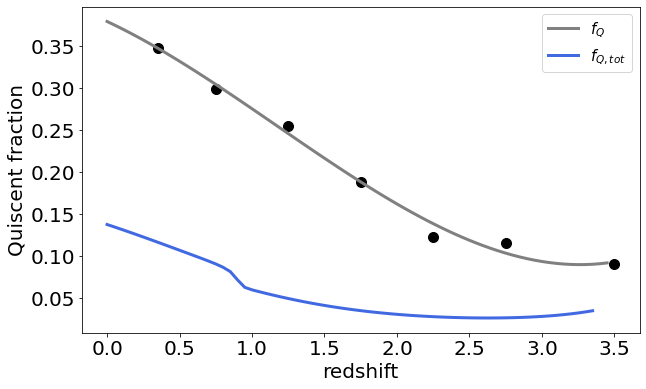

In [18]:
plt.figure(figsize = (10, 6))
plt.plot(xs, temps[0]*xs**3 + temps[1]*xs**2 + temps[2]*xs**1 +temps[3], linewidth = 3, label = r'$f_{Q}$', color = 'grey')
plt.scatter(reds , fqs, s = 100, color = 'black')

plt.plot(xs[:-2], (temps[0]*xs**3 + temps[1]*xs**2 + temps[2]*xs**1 +temps[3])[:-2] * (ups / downs), linewidth = 3, label = '$f_{Q, tot}$', color = 'royalblue')

plt.xlabel('redshift', fontsize = 20)
plt.ylabel('Quiscent fraction', fontsize = 20)

plt.legend(fontsize = 15)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# plt.savefig('fraction.png')

In [22]:
temps

array([ 0.00906133, -0.03191816, -0.08110769,  0.37907202])

In [23]:
np.interp(zs, xs[:-2], (temps[0]*xs**3 + temps[1]*xs**2 + temps[2]*xs**1 +temps[3])[:-2] * (ups / downs))

array([0.13032105, 0.1295687 , 0.12676265, 0.12421139, 0.12426464,
       0.12209699, 0.11895283, 0.11831281, 0.11698778, 0.11666307,
       0.11553354, 0.11443189, 0.11246475, 0.11063296, 0.11134696,
       0.10767782, 0.10698599, 0.10526432, 0.10464297, 0.10425917,
       0.10385072, 0.10401374, 0.10116541, 0.1000932 , 0.09965073,
       0.0993823 , 0.09919046, 0.0974532 , 0.09551393, 0.09489269,
       0.09442544, 0.09226914, 0.09262523, 0.09205113, 0.08452283,
       0.08582665, 0.08569473, 0.08161802, 0.082775  , 0.08209154,
       0.07574587, 0.07430328, 0.07326846, 0.07437192, 0.07025961,
       0.07378418, 0.06570053, 0.0646341 , 0.06567359, 0.06211418,
       0.06240607, 0.06191345, 0.06157871, 0.06072329, 0.05943094,
       0.05926998, 0.06032478, 0.05898639, 0.05864913, 0.05613977,
       0.05634047, 0.05594788, 0.0565566 , 0.05536785, 0.05520565,
       0.05548691, 0.05486581, 0.05205426, 0.05390975, 0.05343073,
       0.05284928, 0.05205402, 0.05133001, 0.05047556])

# Define Mass function

In [24]:
cosmo.H(0)

<Quantity 70. km / (Mpc s)>

In [25]:
c = 1 / (70 * 3.24078e-20) / 60 / 60 / 24 / 365

In [26]:
def M(z):

#     c = 536193364890127632680774277159144241409600525767941292032
    const = 357298811851894940974813331366502642478827036268125785100398519031666577647258980811948807672906209337094533700659412887845954036417651997292215858327829930464479744607200546063412733729153298468855807861238351080151268291780804608
    m = const / (1002757951016302280704*z - 101354391542156296192 * np.log(z+1) + 6543776008972799049728)**10
    
    return m

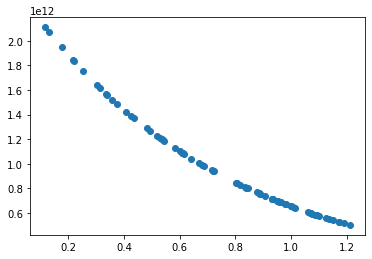

In [27]:
plt.scatter(zs, M(zs))

# Calculate Quenching timescale

In [28]:
def find_rgb(mems):
    
    smask = total_pd['Seq'].isin(mems)
    samp = total_pd[smask]
    
    flag = np.log10(10**np.array(samp['sSFR']) * 3 * cosmo.age(samp['zphot']).to(u.yr).value)
    
#     print(flag)
    
#     0.19133148023451435, 1.185837332727821
    
    rmask = flag < 0.191
    gmask = (0.191 < flag) & (flag < 1.1858)
    bmask = 1.1858 < flag 
    
    return len(samp[rmask]), len(samp[gmask]), len(samp[bmask])

In [29]:
def find_radius(z, r):
    r = cosmo.arcsec_per_kpc_proper(z) * r * u.Mpc # arcsec
    
    return r.to(u.deg).value

In [30]:
def find_rgb_err(num):
    
    smask = (ras[num] - total_pd['RAJ2000'])**2 + (decs[num] - total_pd['DEJ2000'])**2 < find_radius(zs[num], 1)**2
    
    zerr = np.random.normal(0, 0.007, 1)[0]
    zmask = (zs[num]+ zerr < total_pd['zphot'] + 0.01 * (zs[num] + 1)) & (zs[num] + zerr > total_pd['zphot'] - 0.01 * (zs[num] + 1))
    
    samp = total_pd[smask & zmask]
    
    flag = np.log10(10**np.array(samp['sSFR']) * 3 * cosmo.age(samp['zphot']).to(u.yr).value)
    
#     print(flag)
    
#     0.19133148023451435, 1.185837332727821
    
    rmask = flag < 0.191
    gmask = (0.191 < flag) & (flag < 1.1858)
    bmask = 1.1858 < flag 
    
    return len(samp[rmask]), len(samp[gmask]), len(samp[bmask])

In [31]:
cls = np.where((hms > 14) & (zs > 0.5))[0]
grps = np.where((hms < 14) & (zs > 0.5))[0]


## Clusters

### Without number count error

In [28]:
t_ds = []
t_fs = []

for cl in cls:

    r, g, b = 0, 0, 0

    while True:
        r, g, b = find_rgb(members[cl])
        
        factor = np.interp(zs[cl], xs[:-2], (temps[0]*xs**3 + temps[1]*xs**2 + temps[2]*xs**1 +temps[3])[:-2] * (ups / downs))
        r = r * (1 - factor)
        if r > 0:
            break
    
    xxs = np.arange(0, 3, 0.0001)


    temp_min = 1e16
    temp_arg = 0

    for k in range(len(xxs)):
        if np.abs(M(zs[cl] + xxs[k]) - M(zs[cl]) / (1 + b/(g+r))) < temp_min:
            temp_min = np.abs(M(zs[cl] + xxs[k]) - M(zs[cl]) / (1 + b/(g+r)))
            temp_arg = k

    z_d = xxs[temp_arg]

    temp_min = 1e16
    temp_arg = 0

    for k in range(len(xxs)):
        if np.abs(M(zs[cl] + z_d + xxs[k]) - M(zs[cl] + z_d) / (1 + (b+g)/r)) < temp_min:
            temp_min = np.abs(M(zs[cl] + z_d + xxs[k]) - M(zs[cl] + z_d) / (1 + (b+g)/r))
            temp_arg = k

    z_f = xxs[temp_arg]

    t_d = cosmo.age(zs[cl]) - cosmo.age(zs[cl] + z_d)
    t_f = cosmo.age(zs[cl] + z_d) - cosmo.age(zs[cl] + z_d + z_f)
    
    t_ds.append(t_d.value * 1e9)
    t_fs.append(t_f.value * 1e9)

In [29]:
t_ds = np.array(t_ds)
t_fs = np.array(t_fs)

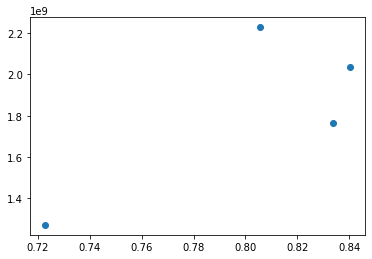

In [30]:
plt.scatter(zs[cls], t_ds + t_fs)

### With number count error

In [137]:
iters = 10

In [138]:
t_ds = []
t_ds_err = []

t_fs = []
t_fs_err = []

t_qs = []
t_qs_err = []

for cl in cls:
    
    print(cl, end = ' ')
    
    t_ds_temp = []
    t_fs_temp = []
    
    for i in range(iters):
    
        r, g, b = 0, 0, 0

        while True:
            r, g, b = find_rgb_err(cl)

            factor = np.interp(zs[cl], xs[:-2], (temps[0]*xs**3 + temps[1]*xs**2 + temps[2]*xs**1 +temps[3])[:-2] * (ups / downs))
            r = r * (1 - factor)
            if r > 0:
                break

        xxs = np.arange(0, 3, 0.0001)


        temp_min = 1e16
        temp_arg = 0

        for k in range(len(xxs)):
            if np.abs(M(zs[cl] + xxs[k]) - M(zs[cl]) / (1 + b/(g+r))) < temp_min:
                temp_min = np.abs(M(zs[cl] + xxs[k]) - M(zs[cl]) / (1 + b/(g+r)))
                temp_arg = k

        z_d = xxs[temp_arg]

        temp_min = 1e16
        temp_arg = 0

        for k in range(len(xxs)):
            if np.abs(M(zs[cl] + z_d + xxs[k]) - M(zs[cl] + z_d) / (1 + (b+g)/r)) < temp_min:
                temp_min = np.abs(M(zs[cl] + z_d + xxs[k]) - M(zs[cl] + z_d) / (1 + (b+g)/r))
                temp_arg = k

        z_f = xxs[temp_arg]

        t_d = cosmo.age(zs[cl]) - cosmo.age(zs[cl] + z_d)
        t_f = cosmo.age(zs[cl] + z_d) - cosmo.age(zs[cl] + z_d + z_f)

        t_ds_temp.append(t_d.value * 1e9)
        t_fs_temp.append(t_f.value * 1e9)
    
    t_ds_temp = np.array(t_ds_temp)
    t_fs_temp = np.array(t_fs_temp)
    ##
    t_ds.append(np.mean(t_ds_temp))
    t_ds_err.append(np.std(t_ds_temp))
    ##
    t_fs.append(np.mean(t_fs_temp))
    t_fs_err.append(np.std(t_fs_temp))
    ##
    t_qs.append(np.mean(t_ds_temp + t_fs_temp))
    t_qs_err.append(np.std(t_ds_temp + t_fs_temp))

33 36 38 39 

<ErrorbarContainer object of 3 artists>

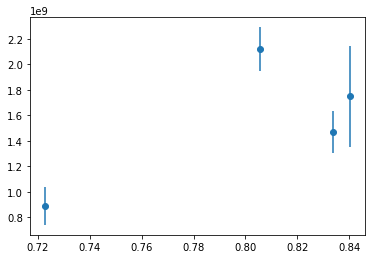

In [139]:
plt.scatter(zs[cls], t_qs)
plt.errorbar(zs[cls], t_qs, yerr = t_qs_err, linestyle = '')

### Stacking Method

In [32]:
t_ds = []
t_fs = []

for i in range(100):

    num_r, num_g, num_b = 0, 0, 0

    for cl in cls:

        while True:
            r, g, b = find_rgb_err(cl)

            factor = np.interp(zs[cl], xs[:-2], (temps[0]*xs**3 + temps[1]*xs**2 + temps[2]*xs**1 +temps[3])[:-2] * (ups / downs))
            r = r * (1 - factor)
            if r > 0:
                break

        num_r += r
        num_g += g
        num_b += b

    z_cl = np.mean(zs[cls])

    xxs = np.arange(0, 3, 0.0001)


    temp_min = 1e16
    temp_arg = 0

    for k in range(len(xxs)):
        if np.abs(M(z_cl + xxs[k]) - M(z_cl) / (1 + b/(g+r))) < temp_min:
            temp_min = np.abs(M(z_cl + xxs[k]) - M(z_cl) / (1 + b/(g+r)))
            temp_arg = k

    z_d = xxs[temp_arg]

    temp_min = 1e16
    temp_arg = 0

    for k in range(len(xxs)):
        if np.abs(M(z_cl + z_d + xxs[k]) - M(z_cl + z_d) / (1 + (b+g)/r)) < temp_min:
            temp_min = np.abs(M(z_cl + z_d + xxs[k]) - M(z_cl + z_d) / (1 + (b+g)/r))
            temp_arg = k

    z_f = xxs[temp_arg]

    t_d = cosmo.age(z_cl) - cosmo.age(z_cl + z_d)
    t_f = cosmo.age(z_cl + z_d) - cosmo.age(z_cl + z_d + z_f)

    t_ds.append(t_d.value * 1e9)
    t_fs.append(t_f.value * 1e9)

t_ds = np.array(t_ds)
t_fs = np.array(t_fs)

t_q = np.mean(t_ds + t_fs)
t_q_err = np.std(t_ds + t_fs)

In [33]:
t_q, t_q_err

(1853987522.9453368, 369193228.31591606)

<ErrorbarContainer object of 3 artists>

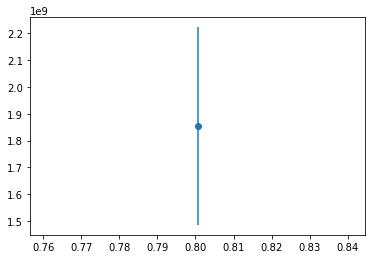

In [34]:
 
plt.scatter(z_cl, t_q)
plt.errorbar(z_cl, t_q, yerr = t_q_err)

In [35]:
const_cl = 5e9 * (1+0.05)**1.5
const2_cl = 5e9 * (1 + 0.05)**0.6

constp_cl = 5.5e9 * (1+0.05)**1.5
constm_cl = 4.5e9 * (1+0.05)**1.5

constp2_cl = 5.5e9 * (1 + 0.05)**0.6
constm2_cl = 4.5e9 * (1 + 0.05)**0.6

const3_cl = 5e9 * (1 + 0.05)**1.9
const4_cl = 5e9 * (1 + 0.05)**2.2
const5_cl = 5e9 * (1 + 0.05)**3.5

const_grp = 7e9 * (1+0.05)**1.5
const2_grp = 7e9 * (1 + 0.05)**0.6

### Plotting

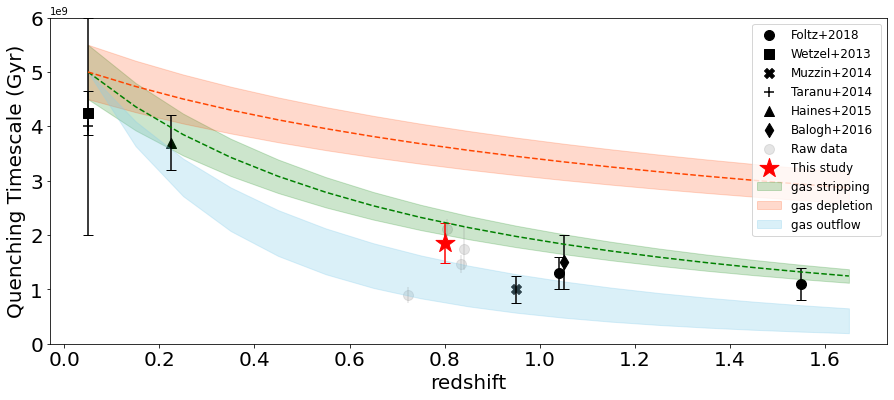

In [141]:
plt.figure(figsize = (15, 6))
########## clusters
#Foltz
plt.scatter(1.04, 1.3e9, s = 100, color = 'black')
plt.errorbar(1.04, 1.3e9, yerr = 0.3e9, color = 'black', capsize = 5)

plt.scatter(1.55, 1.1e9, label = 'Foltz+2018', s = 100, color = 'black')
plt.errorbar(1.55, 1.1e9, yerr = 0.3e9, color = 'black', capsize = 5)

#Wetzel 2013
plt.scatter(0.05, 4.25e9, label = 'Wetzel+2013', s = 100, color = 'black', marker = 's')
plt.errorbar(0.05, 4.25e9, yerr = 0.4e9, color = 'black', capsize = 5)

#Muzzin 2014
plt.scatter(0.95, 1e9, label = 'Muzzin+2014', s = 100, color = 'black', marker = 'X')
plt.errorbar(0.95, 1e9, yerr = 0.25e9, color = 'black', capsize = 5)

#Taranu et al. 2014
plt.scatter(0.05, 4e9, label = 'Taranu+2014', s = 100, color = 'black', marker = '+')
plt.errorbar(0.05, 4e9, yerr = 2e9, color = 'black', capsize = 5)

#Haines et al. 2015
plt.scatter(0.225, 3.7e9, label = 'Haines+2015', s = 100, color = 'black', marker = '^')
plt.errorbar(0.225, 3.7e9, yerr = 0.5e9, color = 'black', capsize = 5)

#Balogh 2016 
plt.scatter(1.05, 1.5e9, label = 'Balogh+2016', s = 100, color = 'black', marker = 'd')
plt.errorbar(1.05, 1.5e9, yerr = 0.5e9, color = 'black', capsize = 5)
#########################################################
##This study
plt.scatter(zs[cls], t_qs, label = 'Raw data', s = 100, color = 'grey', alpha = .2)
plt.errorbar(zs[cls], t_qs, yerr = t_qs_err, linestyle = '', color = 'grey', alpha = .2)


plt.scatter(z_cl, t_q, color = 'red', s = 400, label = 'This study', marker = '*')
plt.errorbar(z_cl, t_q, yerr = t_q_err, color = 'red', capsize = 5)


########################################################################

zrange = np.arange(0.05, 1.7, 0.1)
plt.plot(zrange, const_cl / (1 + zrange)**(3/2),  color = 'green', linestyle = '--')
plt.fill_between(zrange, constp_cl / (1 + zrange)**(3/2), constm_cl / (1 + zrange)**(3/2), color = 'green', alpha = .2, label = 'gas stripping')

plt.plot(zrange, const2_cl / (1 + zrange)**(0.6), color = 'orangered', linestyle = '--')
plt.fill_between(zrange, constp2_cl / (1 + zrange)**(0.6), constm2_cl / (1 + zrange)**(0.6), color = 'orangered', alpha = .2,  label = 'gas depletion ')

plt.fill_between(zrange, const4_cl / (1 + zrange)**2.2, const5_cl / (1 + zrange)**3.5, color = 'skyblue', alpha = .3, label = 'gas outflow')


plt.legend(fontsize = 12)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.xlabel('redshift', fontsize = 20)
plt.ylabel('Quenching Timescale (Gyr)', fontsize = 20)

plt.ylim(0,6e9)

# plt.yscale('log')

plt.savefig('quenching_time_cluster.png')

In [142]:
t_q, t_q_err

(1853987522.9453368, 369193228.31591606)

## Groups

In [68]:
def fit(x, a, b):
    result = a*(1+x)**b
    
    return result

### Without number count error

In [69]:
t_ds = []
t_fs = []

for gp in grps:

    r, g, b = 0, 0, 0

    while True:
        r, g, b = find_rgb(members[gp])
        
        factor = np.interp(zs[gp], xs[:-2], (temps[0]*xs**3 + temps[1]*xs**2 + temps[2]*xs**1 +temps[3])[:-2] * (ups / downs))
        r = r * (1 - factor)
        if r > 0:
            break
    
    xxs = np.arange(0, 3, 0.0001)


    temp_min = 1e16
    temp_arg = 0

    for k in range(len(xxs)):
        if np.abs(M(zs[gp] + xxs[k]) - M(zs[gp]) / (1 + b/(g+r))) < temp_min:
            temp_min = np.abs(M(zs[gp] + xxs[k]) - M(zs[gp]) / (1 + b/(g+r)))
            temp_arg = k

    z_d = xxs[temp_arg]

    temp_min = 1e16
    temp_arg = 0

    for k in range(len(xxs)):
        if np.abs(M(zs[gp] + z_d + xxs[k]) - M(zs[gp] + z_d) / (1 + (b+g)/r)) < temp_min:
            temp_min = np.abs(M(zs[gp] + z_d + xxs[k]) - M(zs[gp] + z_d) / (1 + (b+g)/r))
            temp_arg = k

    z_f = xxs[temp_arg]

    t_d = cosmo.age(zs[gp]) - cosmo.age(zs[gp] + z_d)
    t_f = cosmo.age(zs[gp] + z_d) - cosmo.age(zs[gp] + z_d + z_f)
    
    t_ds.append(t_d.value * 1e9)
    t_fs.append(t_f.value * 1e9)

In [70]:
t_ds = np.array(t_ds)
t_fs = np.array(t_fs)

In [71]:
popt, pcov = curve_fit(fit, zs[grps], t_ds + t_fs)
a, b = popt
a, b

(3939617672.4584594, -0.3946188445868886)

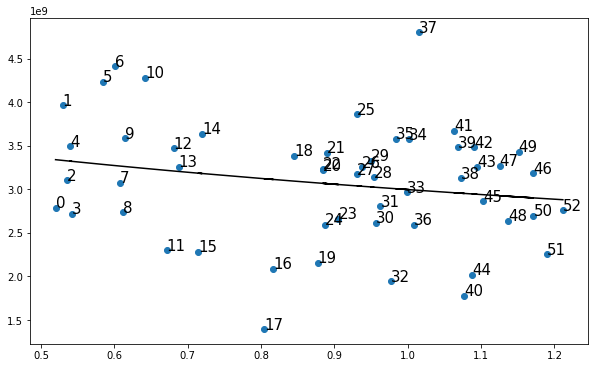

In [72]:
plt.figure(figsize = (10, 6))
plt.scatter(zs[grps], t_ds + t_fs)
plt.plot(zs[grps], a *(1 + zs[grps])**b, color = 'black')

for i in range(len(grps)):
    plt.text(zs[grps][i], (t_ds + t_fs)[i], i, fontsize = 15)

In [503]:
# grps

### With number count error

In [73]:
iters = 100

In [74]:
t_ds = []
t_ds_err = []

t_fs = []
t_fs_err = []

t_qs = []
t_qs_err = []

for gp in grps:
    
    print(gp, end = ' ')
    
    t_ds_temp = []
    t_fs_temp = []
    
    for i in range(iters):
    
        r, g, b = 0, 0, 0

        while True:
            r, g, b = find_rgb_err(gp)

            factor = np.interp(zs[gp], xs[:-2], (temps[0]*xs**3 + temps[1]*xs**2 + temps[2]*xs**1 +temps[3])[:-2] * (ups / downs))
            r = r * (1 - factor)
            if r > 0:
                break

        xxs = np.arange(0, 3, 0.0001)


        temp_min = 1e16
        temp_arg = 0

        for k in range(len(xxs)):
            if np.abs(M(zs[gp] + xxs[k]) - M(zs[gp]) / (1 + b/(g+r))) < temp_min:
                temp_min = np.abs(M(zs[gp] + xxs[k]) - M(zs[gp]) / (1 + b/(g+r)))
                temp_arg = k

        z_d = xxs[temp_arg]

        temp_min = 1e16
        temp_arg = 0

        for k in range(len(xxs)):
            if np.abs(M(zs[gp] + z_d + xxs[k]) - M(zs[gp] + z_d) / (1 + (b+g)/r)) < temp_min:
                temp_min = np.abs(M(zs[gp] + z_d + xxs[k]) - M(zs[gp] + z_d) / (1 + (b+g)/r))
                temp_arg = k

        z_f = xxs[temp_arg]

        t_d = cosmo.age(zs[gp]) - cosmo.age(zs[gp] + z_d)
        t_f = cosmo.age(zs[gp] + z_d) - cosmo.age(zs[gp] + z_d + z_f)

        t_ds_temp.append(t_d.value * 1e9)
        t_fs_temp.append(t_f.value * 1e9)
    
    t_ds_temp = np.array(t_ds_temp)
    t_fs_temp = np.array(t_fs_temp)
    ##
    t_ds.append(np.mean(t_ds_temp))
    t_ds_err.append(np.std(t_ds_temp))
    ##
    t_fs.append(np.mean(t_fs_temp))
    t_fs_err.append(np.std(t_fs_temp))
    ##
    t_qs.append(np.mean(t_ds_temp + t_fs_temp))
    t_qs_err.append(np.std(t_ds_temp + t_fs_temp))

17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 37 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 

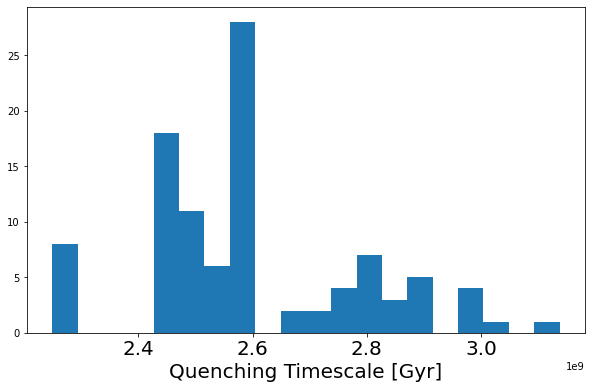

In [75]:
plt.figure(figsize = (10, 6))
plt.hist(t_ds_temp + t_fs_temp, bins = 20)

plt.xticks(fontsize = 20)
plt.xlabel('Quenching Timescale [Gyr]', fontsize = 20)
plt.savefig('dist.png')

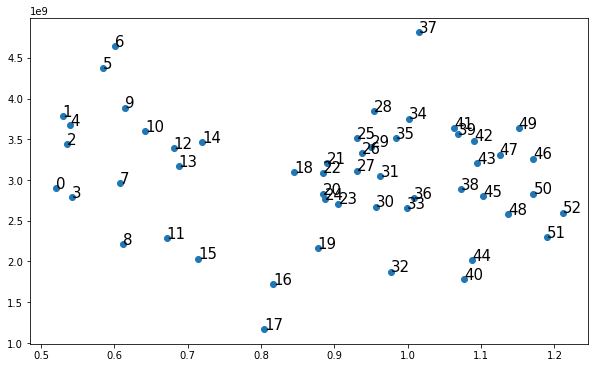

In [76]:
plt.figure(figsize = (10, 6))
plt.scatter(zs[grps], t_qs)

for i in range(len(t_qs)):
    plt.text(zs[grps][i], t_qs[i], i, fontsize = 15)

In [77]:
t_qs = np.array(t_qs)

In [78]:
popt, pcov = curve_fit(fit, zs[grps], t_qs)
aa, bb = popt
aa, bb

(3810834892.2250133, -0.35648962810091295)

### Stacking Method

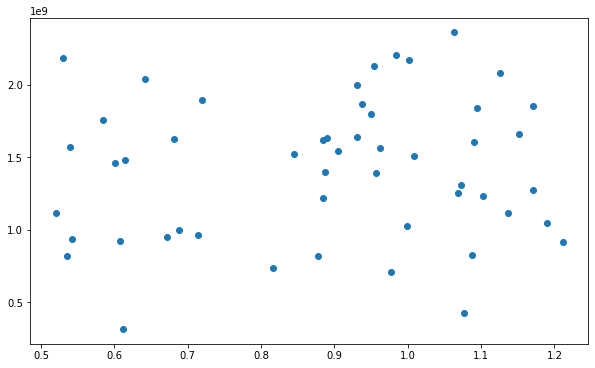

In [82]:
idxs = list(range(len(grps)))
idxs = [x for x in idxs if x not in [17, 37]]

plt.figure(figsize = (10, 6))
plt.scatter(zs[grps][idxs], [(t_ds + t_fs)[i] for i in idxs])

In [83]:
stacked_t_qs1 = []
stacked_t_qs_err1 = []


for z in np.arange(0.55, 0.70, 0.05):
    print(f'{z:.3f}', end = ' ')
    mask = (zs > z - 0.05) & (zs < z + 0.05)
    
    grpss = np.where(mask)[0]
    grpss = [x for x in grpss if x in idxs]
    
    t_ds = []
    t_fs = []
    
    for i in range(10):
    
        num_r, num_g, num_b = 0, 0, 0

        for gp in grpss:

            while True:
                r, g, b = find_rgb_err(gp)

                factor = np.interp(zs[gp], xs[:-2], (temps[0]*xs**3 + temps[1]*xs**2 + temps[2]*xs**1 +temps[3])[:-2] * (ups / downs))
                r = r * (1 - factor)
                if r > 0:
                    break

            num_r += r
            num_g += g
            num_b += b

        xxs = np.arange(0, 3, 0.0001)


        temp_min = 1e16
        temp_arg = 0

        for k in range(len(xxs)):
            if np.abs(M(z + xxs[k]) - M(z) / (1 + b/(g+r))) < temp_min:
                temp_min = np.abs(M(z + xxs[k]) - M(z) / (1 + b/(g+r)))
                temp_arg = k

        z_d = xxs[temp_arg]

        temp_min = 1e16
        temp_arg = 0

        for k in range(len(xxs)):
            if np.abs(M(z + z_d + xxs[k]) - M(z + z_d) / (1 + (b+g)/r)) < temp_min:
                temp_min = np.abs(M(z + z_d + xxs[k]) - M(z + z_d) / (1 + (b+g)/r))
                temp_arg = k

        z_f = xxs[temp_arg]

        t_d = cosmo.age(z) - cosmo.age(z + z_d)
        t_f = cosmo.age(z + z_d) - cosmo.age(z + z_d + z_f)

        t_ds.append(t_d.value * 1e9)
        t_fs.append(t_f.value * 1e9)
        
    
    t_ds = np.array(t_ds)
    t_fs = np.array(t_fs)
    
    stacked_t_qs1.append(np.mean(t_ds + t_fs))
    stacked_t_qs_err1.append(np.std(t_ds+t_fs))

0.550 0.600 0.650 

In [84]:
stacked_t_qs2 = []
stacked_t_qs_err2 = []


for z in np.arange(0.85, 1.20, 0.05):
    print(f'{z:.3f}', end = ' ')
    mask = (zs > z - 0.05) & (zs < z + 0.05)
    
    grpss = np.where(mask)[0]
    grpss = [x for x in grpss if x in idxs]

    t_ds = []
    t_fs = []
    
    for i in range(10):
    
        num_r, num_g, num_b = 0, 0, 0

        for gp in grpss:

            while True:
                r, g, b = find_rgb_err(gp)

                factor = np.interp(zs[gp], xs[:-2], (temps[0]*xs**3 + temps[1]*xs**2 + temps[2]*xs**1 +temps[3])[:-2] * (ups / downs))
                r = r * (1 - factor)
                if r > 0:
                    break

            num_r += r
            num_g += g
            num_b += b

        xxs = np.arange(0, 3, 0.0001)


        temp_min = 1e16
        temp_arg = 0

        for k in range(len(xxs)):
            if np.abs(M(z + xxs[k]) - M(z) / (1 + b/(g+r))) < temp_min:
                temp_min = np.abs(M(z + xxs[k]) - M(z) / (1 + b/(g+r)))
                temp_arg = k

        z_d = xxs[temp_arg]

        temp_min = 1e16
        temp_arg = 0

        for k in range(len(xxs)):
            if np.abs(M(z + z_d + xxs[k]) - M(z + z_d) / (1 + (b+g)/r)) < temp_min:
                temp_min = np.abs(M(z + z_d + xxs[k]) - M(z + z_d) / (1 + (b+g)/r))
                temp_arg = k

        z_f = xxs[temp_arg]

        t_d = cosmo.age(z) - cosmo.age(z + z_d)
        t_f = cosmo.age(z + z_d) - cosmo.age(z + z_d + z_f)

        t_ds.append(t_d.value * 1e9)
        t_fs.append(t_f.value * 1e9)
        
    
    t_ds = np.array(t_ds)
    t_fs = np.array(t_fs)
    
    stacked_t_qs2.append(np.mean(t_ds + t_fs))
    stacked_t_qs_err2.append(np.std(t_ds+t_fs))

0.850 0.900 0.950 1.000 1.050 1.100 1.150 

In [85]:
new_zs = [0.55, 0.60, 0.65, 0.85, 0.90, 0.95, 1.00, 1.05, 1.10, 1.15]

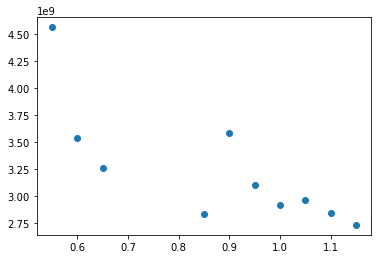

In [86]:
plt.scatter(new_zs, stacked_t_qs1 + stacked_t_qs2)

In [87]:
xx = new_zs
yy = stacked_t_qs1 + stacked_t_qs2
yy_err = stacked_t_qs_err1 + stacked_t_qs_err2

In [88]:
popt, pcov = curve_fit(fit, xx, yy)
a, b

/home/ehko/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(3939617672.4584594, 14)

In [91]:
# const = 7e9 * (1+0.05)**1.5
constp = 7.5e9 * (1+0.05)**1.5
constm = 6.5e9 * (1+0.05)**1.5

# const2 = 7e9 * (1 + 0.05)**0.6
constp2 = 7.5e9 * (1 + 0.05)**0.6
constm2 = 6.5e9 * (1 + 0.05)**0.6

const3_grp = 7e9 * (1 + 0.05)**1.9
const4_grp = 7e9 * (1 + 0.05)**2.2
const5_grp = 7e9 * (1 + 0.05)**3.5

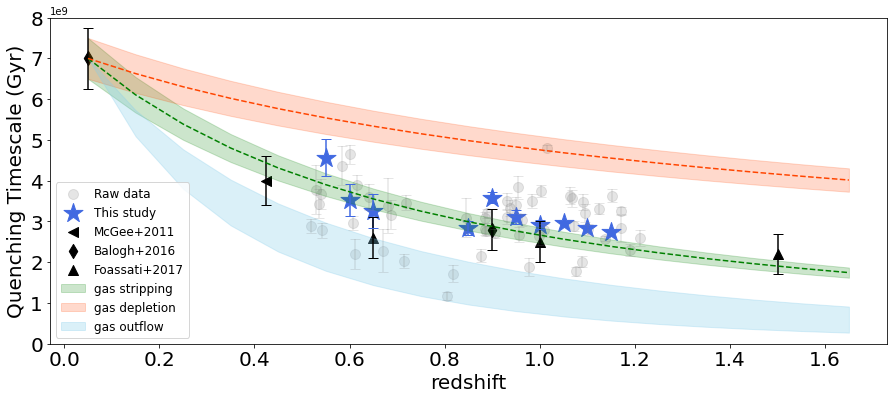

In [134]:
plt.figure(figsize = (15, 6))
plt.scatter(zs[grps], t_qs, color = 'grey', s = 100, alpha = .2, label = 'Raw data')
plt.errorbar(zs[grps], t_qs, yerr = t_qs_err, linestyle = ' ', color = 'grey', alpha = .2, capsize = 5)

# plt.plot(zs[grps], aa *(1 + zs[grps])**bb, color = 'grey', label = 'This study', linestyle = '--')

#stacked
plt.scatter(xx, yy, color = 'royalblue', marker = '*', s = 400, label = 'This study')
plt.errorbar(xx, yy, yerr = yy_err, linestyle = '', color = 'royalblue', capsize = 5)

# plt.scatter(np.arange(0.55, 1.20, 0.05), stacked_t_qs, color = 'royalblue', marker = 'd')
# plt.errorbar(np.arange(0.55, 1.20, 0.05), stacked_t_qs, yerr = stacked_t_qs_err, linestyle = '', color = 'royalblue')
# plt.plot(np.arange(0.55, 1.20, 0.05), a *(1 + np.arange(0.55, 1.16, 0.05))**b, color = 'grey', label = 'This study', linestyle = '--')

######################################## groups
#McGee 2011
plt.scatter(0.425, 4e9, label = 'McGee+2011', s = 100, marker = '<', color = 'black')
plt.errorbar(0.425, 4e9, yerr = 0.6e9, color = 'black', capsize = 5)


#Balogh 2016
plt.scatter(0.05, 7e9, s = 100, marker = 'd', color = 'black')
plt.errorbar(0.05, 7e9, yerr = 0.75e9, color = 'black', capsize = 5)

plt.scatter(0.9, 2.8e9, label = 'Balogh+2016', s = 100, marker = 'd', color = 'black')
plt.errorbar(0.9, 2.8e9, yerr = 0.5e9, color = 'black', capsize = 5)

#Fossati 2017
plt.scatter(0.65, 2.6e9, s = 100, marker = '^', color = 'black')
plt.errorbar(0.65, 2.6e9, yerr = 0.5e9,  color = 'black', capsize = 5)

plt.scatter(1, 2.5e9,  s = 100, marker = '^', color = 'black')
plt.errorbar(1, 2.5e9, yerr = 0.5e9,  color = 'black', capsize = 5)

plt.scatter(1.5, 2.2e9, label = 'Foassati+2017', s = 100, marker = '^',  color = 'black')
plt.errorbar(1.5, 2.2e9, yerr = 0.5e9,  color = 'black', capsize = 5)


########################################################################
zrange = np.arange(0.05, 1.7, 0.1)

plt.plot(zrange, const_grp / (1 + zrange)**(3/2),  color = 'green', linestyle = '--')
plt.fill_between(zrange, constp / (1 + zrange)**(3/2), constm / (1 + zrange)**(3/2), color = 'green', alpha = .2, label = 'gas stripping')

plt.plot(zrange, const2_grp / (1 + zrange)**(0.6), color = 'orangered', linestyle = '--')
plt.fill_between(zrange, constp2 / (1 + zrange)**(0.6), constm2 / (1 + zrange)**(0.6), color = 'orangered', alpha = .2, label = 'gas depletion')

# plt.plot(zs, const3_grp / (1 + zs)**1.9, color = 'salmon', label = 'gas-outflow')
plt.fill_between(zrange, const4_grp / (1 + zrange)**2.2, const5_grp / (1 + zrange)**3.5, color = 'skyblue', alpha = .3, label = 'gas outflow')

plt.legend(fontsize = 12)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.xlabel('redshift', fontsize = 20)
plt.ylabel('Quenching Timescale (Gyr)', fontsize = 20)

plt.ylim(0,8e9)

plt.savefig('quenching_time_group.png')

<ErrorbarContainer object of 3 artists>

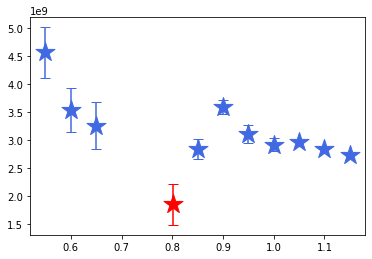

In [127]:
# plt.figure(figsize = (15, 6))
# # plt.scatter(zs[grps], t_qs, color = 'grey', s = 100, alpha = .1, label = 'Raw data')
# # plt.errorbar(zs[grps], t_qs, yerr = t_qs_err, linestyle = ' ', color = 'grey', alpha = .2, capsize = 5)

# # plt.plot(zs[grps], aa *(1 + zs[grps])**bb, color = 'grey', label = 'This study', linestyle = '--')

# #stacked
plt.scatter(xx, yy, color = 'royalblue', marker = '*', s = 400, label = 'Galaxy Group')
plt.errorbar(xx, yy, yerr = yy_err, linestyle = '', color = 'royalblue', capsize = 5)

##This study
plt.scatter(z_cl, t_q, color = 'red', s = 400, label = 'Galaxy Cluster', marker = '*')
plt.errorbar(z_cl, t_q, yerr = t_q_err, color = 'red', capsize = 5)

########################################################################


In [130]:
yy

[4565681431.529237,
 3535596149.0694046,
 3258012779.354841,
 2837040351.265679,
 3586657023.524844,
 3108195819.6430025,
 2920756913.2841573,
 2969972413.1147184,
 2848969929.8082166,
 2735094244.5257845]

### FOF Ploting

In [328]:
fofs_grp = fofs[grps]

In [341]:
xx = fofs_grp[18:]
yy = t_qs[18:]

xx = np.array(xx)
yy = np.array(yy)

In [345]:
meds = []

for i in np.arange(min(xx), max(xx), 0.01):
    fmask = (i - 0.02 < xx) & (xx < i + 0.02)
    vals = yy[fmask]
    
    meds.append(np.median(vals))

In [349]:
# meds

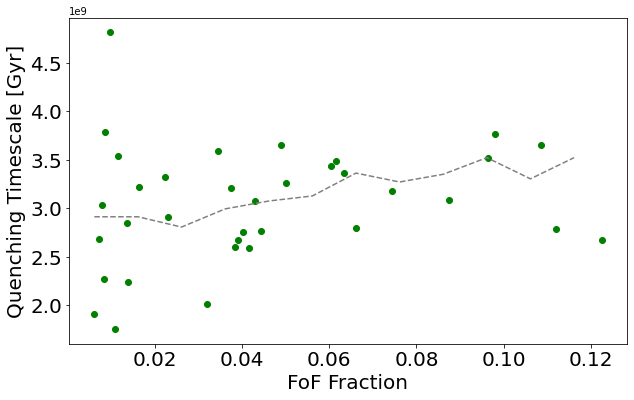

In [368]:
plt.figure(figsize = (10, 6))
plt.scatter(fofs_grp[18:], t_qs[18:], color = 'green')
plt.plot( np.arange(min(xx), max(xx), 0.01), meds, color = 'grey', linestyle = '--')

plt.xlabel('FoF Fraction', fontsize = 20)
plt.ylabel('Quenching Timescale [Gyr]', fontsize = 20)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.savefig('wfm.png')